## <font color=blue> Calculus Extreme Values using Python and SymPy

This is part of the series of math algorithms to define 3D shapes as math objects.

### <font color=blue> Problem: 
Find the absolute extrema for the specified function (expression) over a given the interval. For example:
* If expression is y = $x^3$ -12x +4 &nbsp;.... and limits of x are -3 to +5
    * The min will occur at: x = 2.0 at which y = -12.0 
    * The max will occur at: x = 5.0 at which y = 69.0

### <font color=blue> Processs:  </font>
- Plot data (optional, to provide visual of data). Generate samples values of x in the interval and calculate corresponding values for y.
- Calculate the 1st derivative.  This is the slope.  Helpful to plot as well.
- Find critical values (where 1st derivative, the slope,  = 0 ); slope will be zero at the min and max. Note that there could be multiple points on x where y is a min or max (e.g. sine curve).
- Find values at the endpoints of the interval (as these could be min or max values but won't have a slope).
- Of the values generated above, sort the list to find the min and max values (x, y).
- Plot values to visually validate.

### <font color=blue> Use of the 1st Derivative: </font>

* This solution uses the 1st derivative of the function. Normally, we think of the 1st derivative as the rate of change; e.g. change of distance over the change of time (velocity, acceleration) or flow (gallons per seconds). The 1st derivative measures the change in 'y' (dependent variable) versus the change in 'x' (the independent variable); hence, the 1st derivative is the slope of the line along the curvature of the line. When the slope is zero, the curvature is flat which it will be the max and min (and perhaps, in other places as well).

### <font color=blue> Notes: </font>

* Section 1 provides the step-by-step algorithm with plots and interim results.  
* Section 2 presents the algorithm in more concise fashion that can be easily copied and used. 
* Section 3 provides provides additional expression that can be plugged into Section 1 and 2 for additional examples. 


## <font color=purple> SECTION 1: Algorithm with execution details (plots of data, interim calculations, etc)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### <font color=blue> Key Inputs: expression and interval for evaluation</font>

In [2]:
from sympy import pprint, init_printing
from sympy import *
init_printing(use_unicode=True)
from sympy import Symbol, Eq,  solveset, S
import math

x= Symbol('x', real=True)                                # define x as a symbol

In [3]:
expr = sin(x) +40                    # test case exression; x_min = -3  x_max = 5
x_min = -3                                  # specify interval (min)
x_max = 5                                  # specify interval (max)
print("Expression:")
display(expr)
print( "Interval: ", x_min,',', x_max)

Expression:


Interval:  -3 , 5


### <font color=blue> Plot the expression for visualization </font>

Expression:


Interval:  -3 , 5


<function matplotlib.pyplot.show(*args, **kw)>

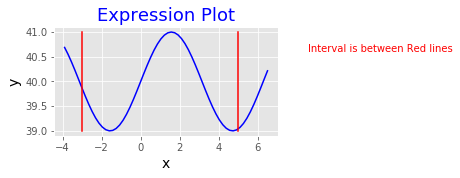

In [4]:
# Plot the function to understand the function and data
print("Expression:")
display(expr)
print( "Interval: ", x_min,',', x_max)

# Create data for plot of function
x_expr = [x for x in np.linspace(start = x_min -.3*abs(x_min), stop = (x_max+.3*abs(x_max)), num = 60)]

y_expr = []
for x_data in x_expr:
    y = expr.subs([(x, x_data)])            # Substitution, uses value of x_data for x in expression
    y_expr.append(y)
x_min_line = [x_min, x_min]
x_max_line = [x_max,x_max]
y_limit_line = [min(y_expr),max(y_expr)]

# Plot data    
plt.figure(figsize=(4,2))                       # resets to new figure   
plt.style.use('ggplot')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.title("Expression Plot", loc='center', fontsize=18, color='b')
plt.plot(x_expr,y_expr, color='b')
plt.plot([x_min,x_min],[min(y_expr),max(y_expr)], color='r')   # limit line at min
plt.plot([x_max,x_max],[min(y_expr),max(y_expr)], color='r')   # limit line at max
#plt.annotate("Interval between Red lines", eval_list[0],textcoords="offset points",xytext=(100,0),color='r')
plt.annotate("Interval is between Red lines", [x_max,max(y_expr)],textcoords="offset points",xytext=(70,-20),color='r')
plt.show

###  <font color=blue> Take a derivative of f(x), the 1st derivative (slope), with respect to x and plot derivative:

In [5]:
from sympy import Derivative
print("Expression:")
display(expr)

deriv1= Derivative(expr, x)                   # take derivative
print('Derivative:' )
display(deriv1.doit())

value_der = deriv1.doit().subs({x:4})             # derivative at x = 4
value_expr = expr.subs([(x, 4)])              # function at x = 4
print('At x = 4, the Value of function is {} and Value of deriviative is {} '.format(value_expr,value_der))
value_der = deriv1.doit().subs({x:0})             # derivative at x = 4
value_expr = expr.subs([(x, 0)])              # function at x = 4
print('At x = 0, the Value of function is {} and Value of deriviative is {} '.format(value_expr,value_der))

Expression:


Derivative:


At x = 4, the Value of function is sin(4) + 40 and Value of deriviative is cos(4) 
At x = 0, the Value of function is 40 and Value of deriviative is 1 


###  <font color=blue> Plot 1st derivative on same chart as expression for visulization

In [6]:
# Create the derivative plot data (function data already done)
x_der = [x for x in np.linspace(start = x_min, stop = x_max, num = 60)]
y_der = []
for x_data in x_der:
    y = deriv1.doit().subs({x:x_data})             # derivative at x = ....
    y_der.append(y)

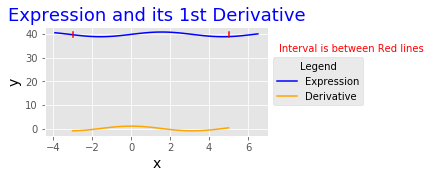

In [7]:
plt.figure(figsize=(4,2))                       # resets to new figure
plt.title('Expression and its 1st Derivative', loc='center', fontsize=18, color='b')
line_chart1 = plt.plot(x_expr, y_expr, color = 'blue')
line_chart2 = plt.plot(x_der, y_der, color = 'orange')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.legend(['Expression', 'Derivative'], loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')
plt.plot([x_min,x_min],[min(y_expr),max(y_expr)], color='r')   # limit line at min
plt.plot([x_max,x_max],[min(y_expr),max(y_expr)], color='r')   # limit line at max
plt.annotate("Interval is between Red lines", [x_max,max(y_expr)],textcoords="offset points",xytext=(50,-20),color='r')
plt.show()

### <font color=blue> Find Critical Values; where 1st derivative (slope) = 0

In [8]:
# Set the (first) derivative equal to zero. Solve for x. Call these values x_cv.
eq1 = Eq(deriv1.doit()) 
print(eq1)
x_cv_temp = solve(eq1,x)               # solve for critical values (get values of x when y = 0)

print('Results of solve:', x_cv_temp)
x_cv = []
for item in x_cv_temp:            # only include those within the interval
    if   x_min <= item <= x_max:
        x_cv.append(item)
print('{} Critcal Values: {} '.format(len(x_cv),x_cv))

# determine if there are > 2 values (--> multiple min or max)
note = ''
if type(solveset(eq1,x)) == Union: note = 'Note: Solution contains multiple min or max values. '

Eq(cos(x), 0)
Results of solve: [pi/2, 3*pi/2]
2 Critcal Values: [pi/2, 3*pi/2] 


### <font color=blue> Evaluate Expression at the Critical Values (slope = 0) and at Endpoints (interval endpoints that don't have a slope). 
    From this, determine max and min values of 'y' where slope (at x = _) is zero or endpoint.  Note that could be multiple points where max and min occurs (e.g. sine curve). 

In [9]:
print('Expression:      ', expr)
print('Critcal Values:  ',x_cv)
eval_list = []            # will include (x,y) tuples for critical values and endpoints
for x_data in x_cv:
    y = expr.subs([(x, x_data)])            # Substitution, uses value of x_data for x in expression to calc y
    eval_list.append((x_data,y))               # include value of x and y as a tuple
eval_list.append((x_min, expr.subs([(x, x_min)])))            # get y at interval lower endpoint
eval_list.append((x_max, expr.subs([(x, x_max)])))            # get y at interval upper endpoint

print('\nEval List:')

# Occassionally, this will produce something like: 1/(4*(sqrt(42)/4 + 13/8)**(1/3)) + 1/2 + (sqrt(42)/4 + 13/8)**(1/3)
# To correct, convert to float
for i in range(len(eval_list)):                # make sure all are floats
    xtemp = float(eval_list[i][0])
    ytemp = float(eval_list[i][1])
    xtemp = float('{:.2g}'.format(xtemp))      # convert to 2 significant figures
    ytemp = float('{:.2g}'.format(ytemp))
    eval_list[i]= (xtemp,ytemp)
    print('    item', i, eval_list[i])
    
eval_list.sort(key=lambda tup: tup[1])                        # sorts in place by 2nd value (y value)
    
print('\nFinal Answer on extreme values (x,y):')
print('    x,y Min: ', eval_list[0])
print('    x,y Max: ', eval_list[-1])

Expression:       sin(x) + 40
Critcal Values:   [pi/2, 3*pi/2]

Eval List:
    item 0 (1.6, 41.0)
    item 1 (4.7, 39.0)
    item 2 (-3.0, 40.0)
    item 3 (5.0, 39.0)

Final Answer on extreme values (x,y):
    x,y Min:  (4.7, 39.0)
    x,y Max:  (1.6, 41.0)


### <font color=blue> Plot data along with annotation of min and max points

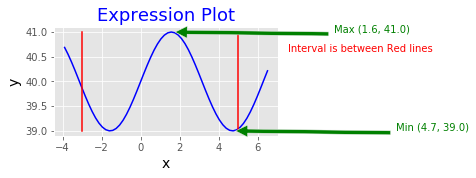

Note: Solution contains multiple min or max values. 


In [10]:
# Plot data along with annotation of min and max points
min_note= 'Min ' + str(eval_list[0])
max_note= 'Max ' + str(eval_list[-1])

fig, ax = plt.subplots(figsize=(4, 2))
plt.style.use('ggplot')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.annotate(max_note, eval_list[-1], ha='center',textcoords="offset points",xytext=(200,0),color='g',
            arrowprops=dict(facecolor='g', shrink=0.02)) 
plt.annotate(min_note, eval_list[0],textcoords="offset points",xytext=(200,0), ha='center', color='g',
             arrowprops=dict(facecolor='g', shrink=0.02))
plt.title("Expression Plot", loc='center', fontsize=18, color='b')
plt.plot(x_expr,y_expr, color='b')
plt.plot([x_min,x_min],[min(y_expr),max(y_expr)], color='r')   # limit line at min
plt.plot([x_max,x_max],[min(y_expr),max(y_expr)], color='r')   # limit line at max
plt.annotate("Interval is between Red lines", [x_max,max(y_expr)],textcoords="offset points",xytext=(50,-20),color='r')
plt.show()
print( note)

## <font color=purple> SECTION 2: Concise Algorithm (without all the plots and interim results)

### <font color=blue> Setup Algorithm as function

In [11]:

def expr_min_max (expr, x, x_min, x_max ):
    """ 
    Purpose:  Calculate the min and max values of a given expression
    Inputs:   Expression to be evaluated, x variable, and interval values (x lower and x upper)
    Process:  Uses 1st derivative to calculate slope = 0 points and then evaluates these points
              (and the endpoints) for the min and max points.
    Outputs:  Two tuples, one representing the (x,y) of min and the other the (x,y) of max 
    """
    from sympy import Derivative
    deriv1= Derivative(expr, x)                   # take derivative
    # Set the (first) derivative equal to zero. Solve for x. Call these values x_cv. (slope = 0 values)
    eq1 = Eq(deriv1.doit())           # get equation of 1st derivative
    x_cv_temp = solve(eq1,x)          # solve 1st derivative for critical values (get values of x when y = 0; i.e. slope = 0)
    x_cv = []                         # list for critical values
    for item in x_cv_temp:            # only include those within the interval
        if   x_min <= item <= x_max:  x_cv.append(item)
    # determine if there are > 2 values (--> multiple min or max)
    if type(solveset(eq1,x)) == Union: print ('Note: Solution contains multiple min or max values. ')
    # Evaluate original function to get y values at critical values of x and  x endpoints
    eval_list = []                  # will include (x,y) tuples for critical values and endpoints
    for x_data in x_cv:
        y = expr.subs([(x, x_data)])     # Substitution, uses value of x_data for x in expression to calc y
        eval_list.append((x_data,y))     # include value of x and y as a tuple
    eval_list.append((x_min, expr.subs([(x, x_min)])))            # get y at interval lower endpoint
    eval_list.append((x_max, expr.subs([(x, x_max)])))            # get y at interval upper endpoint
    # Evaluate these critical points to get min and max
    for i in range(len(eval_list)):                # make sure all are floats
        xtemp = float(eval_list[i][0])
        ytemp = float(eval_list[i][1])
        xtemp = float('{:.2g}'.format(xtemp))      # convert to 2 significant figures
        ytemp = float('{:.2g}'.format(ytemp))
        eval_list[i]= (xtemp,ytemp)
    eval_list.sort(key=lambda tup: tup[1])         # sorts in place by 2nd value (y value)
    return  eval_list[0], eval_list[-1]            # return two tuples: min (x,y) and max (x,y)

### <font color=blue> Execute Concise Algorithm

In [12]:
import numpy as np
from sympy import pprint, init_printing
from sympy import *
init_printing(use_unicode=True)
from sympy import Symbol, Eq,  solveset, S
import math

# Specifiy inputs (expression, interval)
x= Symbol('x', real=True)                   # define x variable as a symbol
eXpr = sin(x) +40                           # test case exression
x_Min, x_Max = -3, 5                        # specify interval (min and max values of x)

# Execute function 
min, max = expr_min_max (eXpr, x, x_Min, x_Max )   # execute function

# Print results
print("Expression:")
display(eXpr)
print( "Interval: ", x_Min,',', x_Max)
print ("Min: {} and Max: {}".format(min, max))

Note: Solution contains multiple min or max values. 
Expression:


Interval:  -3 , 5
Min: (4.7, 39.0) and Max: (1.6, 41.0)


## <font color=purple> SECTION 3: Additional Problems

In [13]:
# Plug these expressions and corresponding limits into Section 1 or 2 for additional examples.
expr = x**3 -12 * x +4                    # test case exression; x_min = -3  x_max = 5
expr= x**4 - 2*x**3 - 12*x + 4            # specify the expression; x_min = -3   x_max = 5 
expr= 2*x**4 - 8*x**3                     # specify the expression; x_min = 2   x_max = 4
expr= 4/x**6  - 3/x**8                    # specify the expression; x_min = .5  x_max = 10
expr= sin(x) +40                          # specify the expression; x_min = -3   x_max = 20 
expr = 2*x**3 +3*x**2 -12*x               # specify the expression; x_min = -20 x_max =20
expr = 3*x**4 -16*x**3 +24*x**2               # specify the expression; x_min = -20 x_max =20
expr = x**2/16                            # parabola, x_min = -4 x_max = 4